In [1]:
import pandas as pd
from io import StringIO

In [2]:
twenty_fifteen_data = pd.read_csv("data/2015.csv")
twenty_seventeen_data = pd.read_csv("data/2017.csv")
twenty_nineteen_data = pd.read_csv("data/2019.csv")

ten_dec_col = twenty_fifteen_data.get("Declaration time")
fifteen_dec_col = twenty_fifteen_data.get("Declaration time")
seventeen_dec_col = twenty_seventeen_data.get("Declaration time")
nineteen_dec_col = twenty_nineteen_data.get("Declaration time")

time_buckets = pd.DataFrame(
    [
        [22.0, 0, 0, 0],
        [22.5, 0, 0, 0],
        [23.0, 0, 0, 0],
        [23.5, 0, 0, 0],
        [0, 0, 0, 0],
        [0.5, 0, 0, 0],
        [1.0, 0, 0, 0],
        [1.5, 0, 0, 0],
        [2.0, 0, 0, 0],
        [2.5, 0, 0, 0],
        [3.0, 0, 0, 0],
        [3.5, 0, 0, 0],
        [4.0, 0, 0, 0],
        [4.5, 0, 0, 0],
        [5.0, 0, 0, 0],
        [5.5, 0, 0, 0],
        [6.0, 0, 0, 0],
        [6.5, 0, 0, 0],
        [7.0, 0, 0, 0],
        [7.5, 0, 0, 0],
        [8.0, 0, 0, 0],
        [8.5, 0, 0, 0],
        [9.0, 0, 0, 0]
    ],
    columns=["declaration_time", "2015_count", "2017_count", "2019_count"]
);

In [3]:
def declaration_time_to_time_bucket_time(declaration_time):
    split_date = declaration_time.split()
    split_time = split_date[1].split(":")
    minute = split_time[1]
    rounded_minute = 30 * round(float(minute) / 30)
    minute_mantissa = 0;
    if rounded_minute == 60 or rounded_minute == 0:
        minute_mantissa = 0
    elif rounded_minute == 30:
        minute_mantissa = .5  
    time_bucket = float(split_time[0]) + minute_mantissa
    return time_bucket

def process_election(election_count_column, declaration_times):
    for dec_time in declaration_times:
        declaration_time_bucket = declaration_time_to_time_bucket_time(dec_time)
        declaration_time_bucket_count = time_buckets.loc[time_buckets['declaration_time'] == declaration_time_bucket, election_count_column]
        time_buckets.loc[time_buckets['declaration_time'] == declaration_time_bucket, election_count_column] = declaration_time_bucket_count.values + 1

process_election("2015_count", fifteen_dec_col)
process_election("2017_count", seventeen_dec_col)
process_election("2019_count", nineteen_dec_col)

time_buckets['declaration_time'] = time_buckets['declaration_time'].astype(str)

time_buckets.to_csv("2015-2019-ge-declaration-times.csv")

time_buckets

,declaration_time,2015_count,2017_count,2019_count
0,22.0,1,0,0
1,22.5,0,0,0
2,23.0,0,5,0
3,23.5,2,0,3
4,0.0,2,4,4
5,0.5,0,6,3
6,1.0,6,39,25
7,1.5,6,20,13
8,2.0,27,101,84
9,2.5,25,90,63


array([<Axes: xlabel='Declaration Time', ylabel='Seats Declared'>,
       <Axes: xlabel='Declaration Time', ylabel='Seats Declared'>,
       <Axes: xlabel='Declaration Time', ylabel='Seats Declared'>],
      dtype=object)

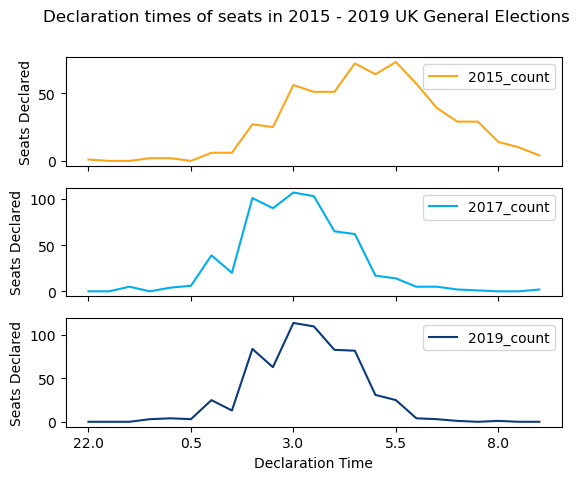

In [4]:
time_buckets.plot.line(
    x="declaration_time",
    xlabel="Declaration Time",
    ylabel="Seats Declared",
    title="Declaration times of seats in 2015 - 2019 UK General Elections",
    subplots=True,
    color={"2015_count": "#FAA61A", "2017_count": "#00AEEF", "2019_count": "#0A3B7C"},
)

<Axes: title={'center': 'Declaration times of seats in 2015 - 2019 UK General Elections'}, xlabel='Declaration Time', ylabel='Seats Declared'>

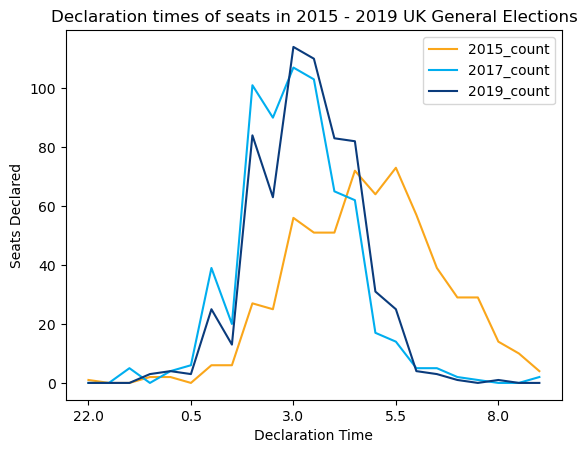

In [5]:
time_buckets.plot.line(
    x="declaration_time",
    xlabel="Declaration Time",
    ylabel="Seats Declared",
    title="Declaration times of seats in 2015 - 2019 UK General Elections",
    color={"2015_count": "#FAA61A", "2017_count": "#00AEEF", "2019_count": "#0A3B7C"},
)